it convert date string to actual date ,mainly in csv file as in xlxs its already converted

In [54]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Ayush\Downloads\newexcel2.xlsx",parse_dates=["day"])
df

,day,MinTemp,MaxTemp,Rainfall,Evaporation
0,2017-01-01,19.0,24.3,NaN,3.4
1,2017-01-04,17.0,NaN,3.6,4.4
2,2017-01-05,13.7,NaN,-1.0,5.8
3,2017-01-06,15.0,15.5,39.8,7.2
4,2017-01-07,NaN,16.1,-1.0,5.6
5,2017-01-08,NaN,16.9,0.0,5.8
6,2017-01-09,6.1,18.2,0.2,4.2


In [33]:
df.columns

Index(['day', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation'], dtype='object')

In [34]:
df.set_index('day',inplace=True)

In [35]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,NaN,3.4
2017-01-04,17.0,NaN,3.6,4.4
2017-01-05,13.7,NaN,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,NaN,16.1,-1.0,5.6
2017-01-08,NaN,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


In [36]:
new_df=df.fillna(0)
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,0.0,3.4
2017-01-04,17.0,0.0,3.6,4.4
2017-01-05,13.7,0.0,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,0.0,16.1,-1.0,5.6
2017-01-08,0.0,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


In [37]:
new_df=df.fillna({
    'MinTemp':0,
     'MaxTemp':0
}
)
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,NaN,3.4
2017-01-04,17.0,0.0,3.6,4.4
2017-01-05,13.7,0.0,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,0.0,16.1,-1.0,5.6
2017-01-08,0.0,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


 carry forward the same value of last upper cell if value is ZERO

In [38]:
new_df=df.fillna(method="ffill")
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,NaN,3.4
2017-01-04,17.0,24.3,3.6,4.4
2017-01-05,13.7,24.3,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,15.0,16.1,-1.0,5.6
2017-01-08,15.0,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


but we can see upper element of trainfall is still NAN,so use bfill(backward fill,i.e.,lower cell value)

In [39]:
new_df=df.fillna(method="bfill")
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,3.6,3.4
2017-01-04,17.0,15.5,3.6,4.4
2017-01-05,13.7,15.5,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,6.1,16.1,-1.0,5.6
2017-01-08,6.1,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


In [40]:
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,3.6,3.4
2017-01-04,17.0,15.5,3.6,4.4
2017-01-05,13.7,15.5,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,6.1,16.1,-1.0,5.6
2017-01-08,6.1,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


 now it will copy the value horizontally as axis=columns

In [41]:
new_df=df.fillna(method="bfill",axis="columns")
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,3.4,3.4
2017-01-04,17.0,3.6,3.6,4.4
2017-01-05,13.7,-1.0,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,16.1,16.1,-1.0,5.6
2017-01-08,16.9,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


In [42]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,NaN,3.4
2017-01-04,17.0,NaN,3.6,4.4
2017-01-05,13.7,NaN,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,NaN,16.1,-1.0,5.6
2017-01-08,NaN,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


In [43]:
new_df=df.fillna(method="ffill",limit=1)
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,NaN,3.4
2017-01-04,17.0,24.3,3.6,4.4
2017-01-05,13.7,NaN,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,15.0,16.1,-1.0,5.6
2017-01-08,NaN,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


In [44]:
new_df=df.interpolate()
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.000000,24.300000,NaN,3.4
2017-01-04,17.000000,21.366667,3.6,4.4
2017-01-05,13.700000,18.433333,-1.0,5.8
2017-01-06,15.000000,15.500000,39.8,7.2
2017-01-07,12.033333,16.100000,-1.0,5.6
2017-01-08,9.066667,16.900000,0.0,5.8
2017-01-09,6.100000,18.200000,0.2,4.2


The value in place of copied 13.3 had a better guess now,i.e.,mid value that is 12.033 and 9.066

In [45]:
new_df=df.interpolate(method="time")
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.000000,24.30,NaN,3.4
2017-01-04,17.000000,19.02,3.6,4.4
2017-01-05,13.700000,17.26,-1.0,5.8
2017-01-06,15.000000,15.50,39.8,7.2
2017-01-07,12.033333,16.10,-1.0,5.6
2017-01-08,9.066667,16.90,0.0,5.8
2017-01-09,6.100000,18.20,0.2,4.2


above should give a value of minTemp of 1/4/17 near 13.7 to be more accurate replacing actual value of 17,but its not working as of now


 Dropped all rows with NA data,etc.

In [46]:
new_df=df.dropna()
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-06,15.0,15.5,39.8,7.2
2017-01-09,6.1,18.2,0.2,4.2


In [47]:
new_df=df
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,NaN,3.4
2017-01-04,17.0,NaN,3.6,4.4
2017-01-05,13.7,NaN,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,NaN,16.1,-1.0,5.6
2017-01-08,NaN,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


it will drop only row where each columns are NA

In [48]:
new_df=df.dropna(how="all")
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,NaN,3.4
2017-01-04,17.0,NaN,3.6,4.4
2017-01-05,13.7,NaN,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,NaN,16.1,-1.0,5.6
2017-01-08,NaN,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


the below means that if more than one NA value then drop it

In [49]:
new_df=df.dropna(thresh=1)
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
day,,,,
2017-01-01,19.0,24.3,NaN,3.4
2017-01-04,17.0,NaN,3.6,4.4
2017-01-05,13.7,NaN,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,NaN,16.1,-1.0,5.6
2017-01-08,NaN,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


In [50]:
dt=pd.date_range("01-01-2017","01-09-2017")
idx=pd.DatetimeIndex(dt)
df=df.reindex(idx)
df

,MinTemp,MaxTemp,Rainfall,Evaporation
2017-01-01,19.0,24.3,NaN,3.4
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,17.0,NaN,3.6,4.4
2017-01-05,13.7,NaN,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,NaN,16.1,-1.0,5.6
2017-01-08,NaN,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


In [51]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation
2017-01-01,19.0,24.3,NaN,3.4
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,17.0,NaN,3.6,4.4
2017-01-05,13.7,NaN,-1.0,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,NaN,16.1,-1.0,5.6
2017-01-08,NaN,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


 lets convert all -1 to NaN

In [52]:
import pandas as pd
import numpy as np

new_df = df.replace(-1, np.NaN)
new_df


,MinTemp,MaxTemp,Rainfall,Evaporation
2017-01-01,19.0,24.3,NaN,3.4
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,17.0,NaN,3.6,4.4
2017-01-05,13.7,NaN,NaN,5.8
2017-01-06,15.0,15.5,39.8,7.2
2017-01-07,NaN,16.1,NaN,5.6
2017-01-08,NaN,16.9,0.0,5.8
2017-01-09,6.1,18.2,0.2,4.2


In [57]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Ayush\Downloads\weatherfinal.xlsx")
df

,MinTemp,MaxTemp,Rainfall,Evaporation
0,8.0,24.3,NaN,3.4
1,14.0,Not available,3.6,4.4
2,13.7,23.4,-1.0,5.8
3,13.3,15.5,39.8,7.2
4,7.6,16.1,-1.0,-2.0
5,6.2,16.9,0.0,5.8
6,6.1,18.2,0.2,4.2


 -1 and -2 both replaced by NaN

In [58]:
new_df = df.replace([-1,-2], np.NaN)
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
0,8.0,24.3,NaN,3.4
1,14.0,Not available,3.6,4.4
2,13.7,23.4,NaN,5.8
3,13.3,15.5,39.8,7.2
4,7.6,16.1,NaN,NaN
5,6.2,16.9,0.0,5.8
6,6.1,18.2,0.2,4.2


In [59]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation
0,8.0,24.3,NaN,3.4
1,14.0,Not available,3.6,4.4
2,13.7,23.4,-1.0,5.8
3,13.3,15.5,39.8,7.2
4,7.6,16.1,-1.0,-2.0
5,6.2,16.9,0.0,5.8
6,6.1,18.2,0.2,4.2


In [60]:
new_df = df.replace({
    "MaxTemp":"Not available",
    "Rainfall":-1,
},np.NaN)
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
0,8.0,24.3,NaN,3.4
1,14.0,NaN,3.6,4.4
2,13.7,23.4,NaN,5.8
3,13.3,15.5,39.8,7.2
4,7.6,16.1,NaN,-2.0
5,6.2,16.9,0.0,5.8
6,6.1,18.2,0.2,4.2


In [62]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation
0,8.0,24.3,NaN,3.4
1,14.0,Not available,3.6,4.4
2,13.7,23.4,-1.0,5.8
3,13.3,15.5,39.8,7.2
4,7.6,16.1,-1.0,-2.0
5,6.2,16.9,0.0,5.8
6,6.1,18.2,0.2,4.2


In [65]:
new_df=df.replace({
    "Not available":np.NaN,
   -1:"no rain"
})
new_df

,MinTemp,MaxTemp,Rainfall,Evaporation
0,8.0,24.3,NaN,3.4
1,14.0,NaN,3.6,4.4
2,13.7,23.4,no rain,5.8
3,13.3,15.5,39.8,7.2
4,7.6,16.1,no rain,-2.0
5,6.2,16.9,0.0,5.8
6,6.1,18.2,0.2,4.2


In [68]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Ayush\Downloads\weatherfinal.xlsx")
df

,MinTemp,MaxTemp,Rainfall,Evaporation,event
0,8.0,24.3,NaN,3.400,sunny
1,14.0,Not available,3.6 MM,4.400,snowfall
2,13.7,23.4 C,-1,5.800,rain
3,13.3,15.5,39.8,0.072,fog
4,7.6,16.1 F,-1,-2.000,cloudy
5,6.2,16.9,0,5.800,mist
6,6.1,18.2,0.2,4.200,dew


 now we want to remove units such as MM,C,%,etc. but this will also remove events as that is also alphabets

In [71]:
new_df = df.replace('[a-zA-Z]', '', regex=True)
new_df


,MinTemp,MaxTemp,Rainfall,Evaporation,event
0,8.0,24.3,NaN,3.400,
1,14.0,,3.6,4.400,
2,13.7,23.4,-1,5.800,
3,13.3,15.5,39.8,0.072,
4,7.6,16.1,-1,-2.000,
5,6.2,16.9,0,5.800,
6,6.1,18.2,0.2,4.200,


In [77]:
new_df = df.replace({
    'MaxTemp':'[a-zA-Z]',
    "Rainfall":'[a-zA-Z]'
},'',regex=True)
new_df

TypeError: 'DataFrame' object is not callable

In [76]:
new_df=new_df.replace( '',np.NaN, regex=True)
new_df


,MinTemp,MaxTemp,Rainfall,Evaporation,event
0,8.0,24.3,NaN,3.400,sunny
1,14.0,Not available,3.6 MM,4.400,snowfall
2,13.7,23.4 C,-1,5.800,rain
3,13.3,15.5,39.8,0.072,fog
4,7.6,16.1 F,-1,-2.000,cloudy
5,6.2,16.9,0,5.800,mist
6,6.1,18.2,0.2,4.200,dew


Replacing a list of values with another list

In [78]:
df=pd.DataFrame({
    'score':['Exceptional','Average',"Good",'Poor','Average',"Exceptional"],
    'Student':["Rob","Maya","Parthiv","Tom","Julian","Erica"]
})
df

,score,Student
0,Exceptional,Rob
1,Average,Maya
2,Good,Parthiv
3,Poor,Tom
4,Average,Julian
5,Exceptional,Erica


In [81]:
new_df=df.replace(['Exceptional','Average',"Good",'Poor'],[1,2,3,4])
new_df

,score,Student
0,1,Rob
1,2,Maya
2,3,Parthiv
3,4,Tom
4,2,Julian
5,1,Erica


In [85]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Ayush\Downloads\Book3.xlsx")
df

,day,city,temperature,windspeed,event
0,2017-01-01,newyork,32,6,rain
1,2017-01-02,newyork,36,7,sunny
2,2017-01-03,newyork,28,12,snow
3,2017-01-04,newyork,33,7,sunny
4,2017-01-01,mumbai,90,5,sunny
5,2017-01-02,mumbai,85,12,fog
6,2017-01-03,mumbai,87,15,fog
7,2017-01-04,mumbai,92,5,rain
8,2017-01-01,paris,45,20,sunny
9,2017-01-02,paris,50,13,cloudy


In [86]:
g =df.groupby('city')
g

In [87]:
for city,city_df in g:
    print(city)
    print(city_df)


mumbai
         day    city  temperature  windspeed  event
4 2017-01-01  mumbai           90          5  sunny
5 2017-01-02  mumbai           85         12    fog
6 2017-01-03  mumbai           87         15    fog
7 2017-01-04  mumbai           92          5   rain
newyork
         day     city  temperature  windspeed  event
0 2017-01-01  newyork           32          6   rain
1 2017-01-02  newyork           36          7  sunny
2 2017-01-03  newyork           28         12   snow
3 2017-01-04  newyork           33          7  sunny
paris
          day   city  temperature  windspeed   event
8  2017-01-01  paris           45         20   sunny
9  2017-01-02  paris           50         13  cloudy
10 2017-01-03  paris           54          8  cloudy
11 2017-01-04  paris           42         10  cloudy


In [88]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,2017-01-01,mumbai,90,5,sunny
5,2017-01-02,mumbai,85,12,fog
6,2017-01-03,mumbai,87,15,fog
7,2017-01-04,mumbai,92,5,rain


In [119]:
g.mean()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_16584\2978112660.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.mean()


,temperature,windspeed
city,,
mumbai,88.50,9.25
newyork,32.25,8.00
paris,47.75,12.75


In [89]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,2017-01-04,92,15,sunny
newyork,2017-01-04,36,12,sunny
paris,2017-01-04,54,20,sunny


 the above three steps was SPLIT,APPLY and COMBINE,as we splitted in citied ,applied operation for max. on each and then combined the results from three in one df

In [116]:
g.describe()

temperature                                                   \
              count   mean       std   min    25%   50%    75%   max   
city                                                                   
mumbai          4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
newyork         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris           4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

        windspeed                                                 
            count   mean       std  min   25%   50%    75%   max  
city                                                              
mumbai        4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
newyork       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris         4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [120]:
g

city
mumbai     Axes(0.125,0.11;0.775x0.77)
newyork    Axes(0.125,0.11;0.775x0.77)
paris      Axes(0.125,0.11;0.775x0.77)
dtype: object

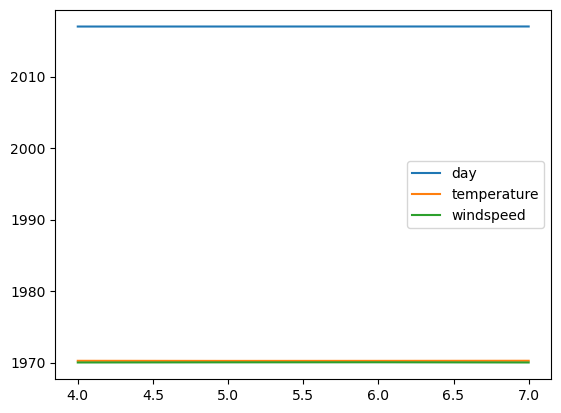

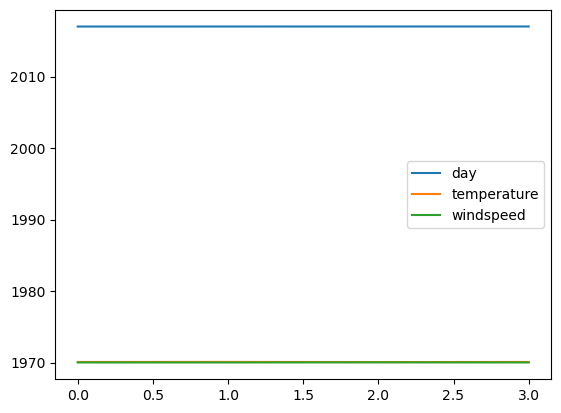

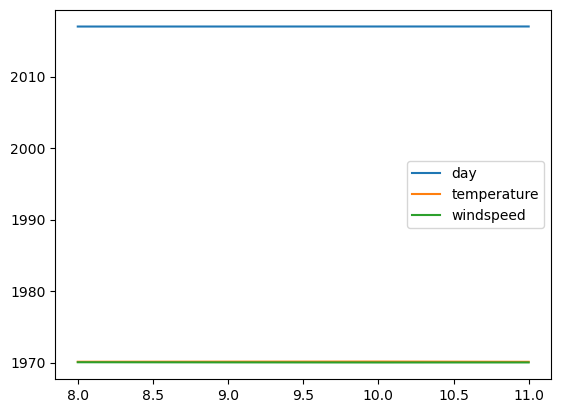

In [122]:
%matplotlib inline
g.plot()

 the above plotting is wrong but code is correct

In [138]:
import pandas as pd

india=pd.DataFrame({
    "city":["mumbai","delhi","bangalore"],
    "temperature":[32,45,30],
    "humidity":[80,60,78]
})
india

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,bangalore,30,78


In [139]:
us=pd.DataFrame({
    "city":["new york","chicago","orlando"],
    "temperature":[21,14,35],
    "humidity":[68,65,75]
})
us

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [141]:
df = pd.concat([india,us])
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,bangalore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [142]:
df = pd.concat([india,us],ignore_index=True)
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,bangalore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [150]:
df = pd.concat([india,us], keys=["india","us"])
df

city  temperature  humidity
india 0     mumbai           32        80
      1      delhi           45        60
      2  bangalore           30        78
us    0   new york           21        68
      1    chicago           14        65
      2    orlando           35        75

In [151]:
df.loc["india"]

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,bangalore,30,78


In [152]:
df.loc["us"]

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [157]:
temperature_df=pd.DataFrame({
    "city":["mumbai","delhi","bangalore"],
    "temperature":[32,45,30],
   
})
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,bangalore,30


In [158]:
windspeed_df=pd.DataFrame({
    "city":["mumbai","delhi","bangalore"],
    "windspeed":[7,12,9],
    
})
windspeed_df

,city,windspeed
0,mumbai,7
1,delhi,12
2,bangalore,9


In [159]:
df=pd.concat([temperature_df,windspeed_df])
df

,city,temperature,windspeed
0,mumbai,32.0,NaN
1,delhi,45.0,NaN
2,bangalore,30.0,NaN
0,mumbai,NaN,7.0
1,delhi,NaN,12.0
2,bangalore,NaN,9.0


In [160]:
df=pd.concat([temperature_df,windspeed_df],axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,7
1,delhi,45,delhi,12
2,bangalore,30,bangalore,9


since axis=1,it will append it as column and not as rows

In [162]:
windspeed_df=pd.DataFrame({
    "city":["delhi","mumbai"],
    "windspeed":[7,12],
    
})
windspeed_df


,city,windspeed
0,delhi,7
1,mumbai,12


In [163]:
df=pd.concat([temperature_df,windspeed_df],axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,delhi,7.0
1,delhi,45,mumbai,12.0
2,bangalore,30,NaN,NaN


In [164]:
windspeed_df=pd.DataFrame({
    "city":["delhi","mumbai"],
    "windspeed":[7,12],
    
},index=[1,0])
windspeed_df

,city,windspeed
1,delhi,7
0,mumbai,12


In [165]:
temperature_df=pd.DataFrame({
    "city":["mumbai","delhi","bangalore"],
    "temperature":[32,45,30],
   
},index=[0,1,2])
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,bangalore,30


In [166]:
df=pd.concat([temperature_df,windspeed_df],axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,bangalore,30,NaN,NaN


In [167]:
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,bangalore,30


In [171]:

s=pd.Series(["humid","dry","rain"],name="event")
s

0    humid
1      dry
2     rain
Name: event, dtype: object

In [172]:
df=pd.concat([temperature_df,s],axis=1)
df

,city,temperature,event
0,mumbai,32,humid
1,delhi,45,dry
2,bangalore,30,rain
